In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)


#import libraries

In [ ]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Air quality prediction/air-quality-observations.csv'

df=pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
display(df.head())

,device_id,date_time,location_description,latitude,longitude,pm1,pm25,pm10,ozone,nitrogen_dioxide,carbon_monoxide,air_quality_category,point
0,ems-b879,2023-01-17T00:26:09+00:00,Fairyland,-37.546758,143.823172,3,3,4,70,97,-1006,Fair,"-37.546758, 143.823172"
1,ems-b879,2023-01-17T02:41:07+00:00,Fairyland,-37.546758,143.823172,2,2,2,75,104,218,Fair,"-37.546758, 143.823172"
2,ems-b879,2023-01-17T03:26:07+00:00,Fairyland,-37.546758,143.823172,2,2,2,61,104,743,Fair,"-37.546758, 143.823172"
3,ems-b879,2023-01-15T05:11:27+00:00,Fairyland,-37.546758,143.823172,0,0,0,70,119,-2143,Fair,"-37.546758, 143.823172"
4,ems-b879,2022-12-23T19:45:10+00:00,Fairyland,-37.546758,143.823172,3,4,4,65,119,-4766,Fair,"-37.546758, 143.823172"


# Remove Outliers

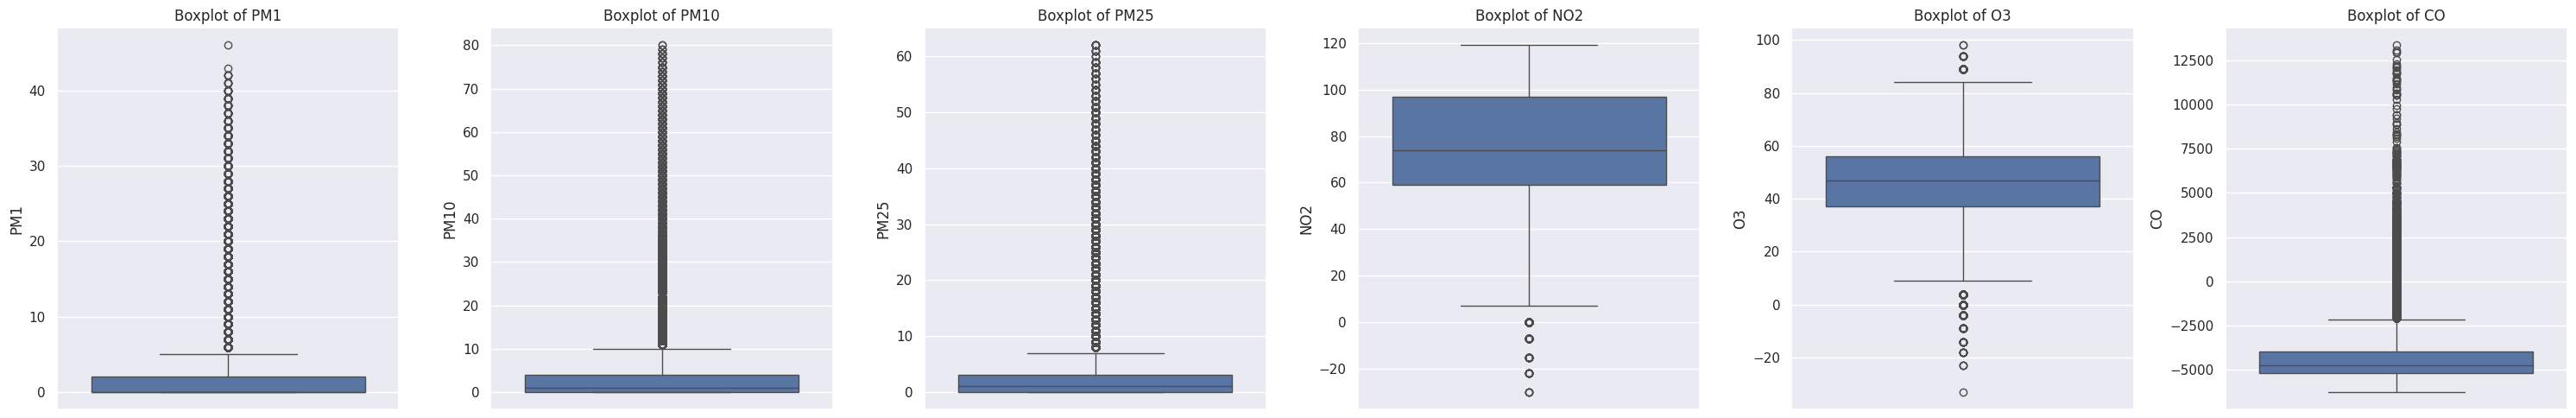

Original shape of the dataset: (110970, 13)
Shape of the dataset after removing outliers: (89700, 13)


In [ ]:
#visulalized Outliers

plt.figure(figsize=(30, 5))

plt.subplot(1, 6, 1)
sns.boxplot(y=df['PM1'])
plt.title('Boxplot of PM1')

plt.subplot(1, 6, 2)
sns.boxplot(y=df['PM10'])
plt.title('Boxplot of PM10')

plt.subplot(1, 6, 3)
sns.boxplot(y=df['PM25'])
plt.title('Boxplot of PM25')

plt.subplot(1, 6, 4)
sns.boxplot(y=df['NO2'])
plt.title('Boxplot of NO2')

plt.subplot(1, 6, 5)
sns.boxplot(y=df['O3'])
plt.title('Boxplot of O3')

plt.subplot(1, 6, 6)
sns.boxplot(y=df['CO'])
plt.title('Boxplot of CO')


plt.tight_layout()
# Save the plot
plt.savefig('/content/drive/MyDrive/Air quality prediction/eda_visualizations/outliers.png')
plt.show()

#remove outliers
numeric_cols=['PM1', 'PM25', 'PM10', 'O3', 'NO2', 'CO']


Q1=df[numeric_cols].quantile(0.25)
Q3=df[numeric_cols].quantile(0.75)
IQR=Q3-Q1


condition =~((df[numeric_cols] < (Q1-1.5*IQR)) | (df[numeric_cols] > (  Q3+1.5*IQR))).any (axis=1)

df_cleaned = df[condition]
print(f"Original shape of the dataset: {df.shape}")
print(f"Shape of the dataset after removing outliers: {df_cleaned.shape}")



